In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df['species']=iris.target
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
import seaborn as sns

<AxesSubplot:xlabel='species', ylabel='count'>

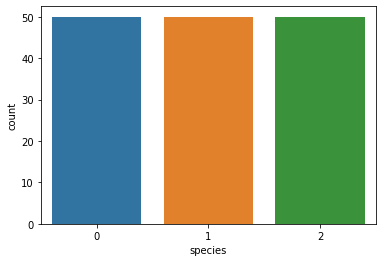

In [10]:
sns.countplot(df['species'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [14]:
x=df.drop('species',axis=1)
y=df['species']

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [18]:
from sklearn.linear_model import LogisticRegression

In [20]:
model=LogisticRegression(multi_class='ovr')
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [21]:
# model evaluation

y_pred=model.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix,classification_report

In [24]:
con_matrix= confusion_matrix(y_test,y_pred)
con_matrix

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [25]:
mul_con_mat=multilabel_confusion_matrix(y_test,y_pred)
mul_con_mat

array([[[20,  0],
        [ 0, 10]],

       [[20,  0],
        [ 0, 10]],

       [[20,  0],
        [ 0, 10]]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

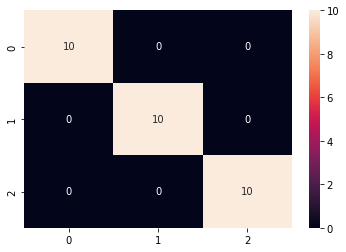

In [27]:
sns.heatmap(con_matrix,annot=True)

In [42]:
df.iloc[65]

sepal length (cm)    6.7
sepal width (cm)     3.1
petal length (cm)    4.4
petal width (cm)     1.4
species              1.0
Name: 65, dtype: float64

In [30]:
# user_input model

user_input=[5.0,3.6,1.4,0.2]
res=model.predict([user_input])
res

array([0])

In [35]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [32]:
features=df.columns
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [33]:
d1={'columns':list(features)}

In [34]:
d1

{'columns': ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)',
  'species']}

In [37]:
import json
with open('features.json','w') as file:
    json.dump(d1,file)